In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Imports
%matplotlib inline

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.stats as stats
from scipy.stats import normaltest

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


### Tahap refining prediksi harga rumah 
* Pada tahap pertama dilakukan identifikasi distribusi variabel target dan variabel prediktor dan menerapkan fungsi transformasi log untuk mengubah distribusi menjadi terdistribusi normal
* Pada Tahap ke dua dilakukan analisis terhadap sejumlah variabel numerik dan mengubah menjadi kategorik menggunakan metode binning dan klastering 

In [13]:
df = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


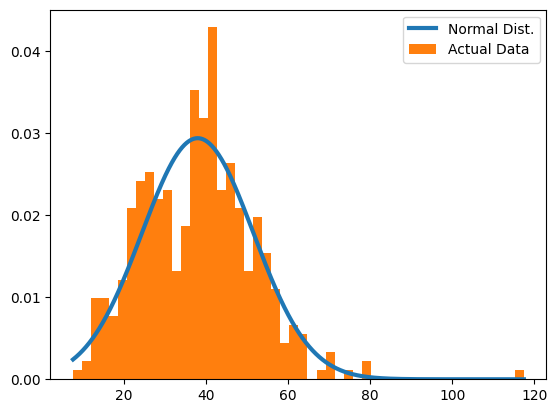

In [14]:
from scipy.stats import norm

# visulisasi variabel target dan melakukan log transform
d2 = df[['Y house price of unit area']].copy()
xs = np.arange(d2['Y house price of unit area'].min(), d2['Y house price of unit area'].max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, density=True, label='Actual Data');
plt.legend();

ref: https://datascienceinpractice.github.io/tutorials/11-TestingDistributions.html

### uji hipotesa 

In [15]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.') # hipotesa nol ditolak
    else:
        print('We do not have evidence to reject the null hypothesis.') #hipotesa nol diterima

In [16]:
# Run normal test on the data
stat, p_val = normaltest(d2)
# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)

We have evidence to reject the null hypothesis.


### kesimpulan untuk data d2 (variabel prediktor)
The null hypothesis is that the data come from a normal distribution.
null hypothesisnya ditolak
jadi data tidak terdistribusi normal

### log transform untuk mendekatkan distribusi data mendekati normal
gunakan fungsi library numpy : np.log

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


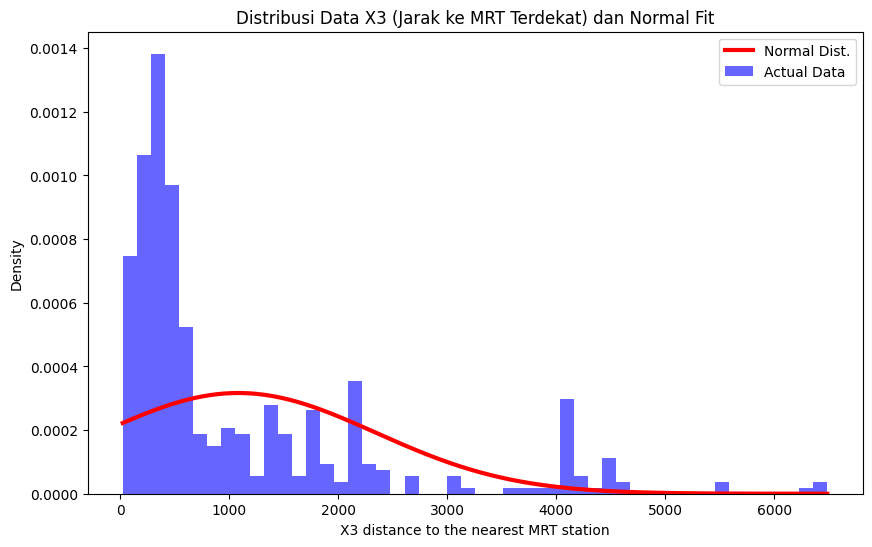

Statistik uji: [156.30380036], P-value: [1.14567385e-34]
Hipotesa nol ditolak. Distribusi data tidak normal.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, normaltest

# Mengambil kolom X3 distance to the nearest MRT station dari dataframe df
d2 = df[['X3 distance to the nearest MRT station']].copy()

# Visualisasi distribusi data dengan histogram dan distribusi normal
xs = np.arange(d2['X3 distance to the nearest MRT station'].min(), 
               d2['X3 distance to the nearest MRT station'].max(), 0.01)
fit = norm.pdf(xs, np.mean(d2), np.std(d2))

plt.figure(figsize=(10, 6))
plt.plot(xs, fit, label='Normal Dist.', lw=3, color='r')
plt.hist(d2, bins=50, density=True, alpha=0.6, color='b', label='Actual Data')
plt.title('Distribusi Data X3 (Jarak ke MRT Terdekat) dan Normal Fit')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Density')
plt.legend()
plt.show()

# Uji normalitas menggunakan D'Agostino K² Test
def check_p_val(p_val, alpha=0.05):
    if p_val < alpha:
        print('Hipotesa nol ditolak. Distribusi data tidak normal.')
    else:
        print('Tidak ada cukup bukti untuk menolak hipotesa nol. Distribusi data normal.')

# Menjalankan uji normalitas
stat, p_val = normaltest(d2)
print(f'Statistik uji: {stat}, P-value: {p_val}')
check_p_val(p_val)

### Latihan : selidiki apakah sudah normal atau belum?


In [18]:
# Run normal test on the data
stat, p_val = normaltest(d3)
# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)

We have evidence to reject the null hypothesis.


### Hasil transformasi log menunjukkan data belum sepenuhnya terdistribusi normal tetapi sudah lebih mendekati

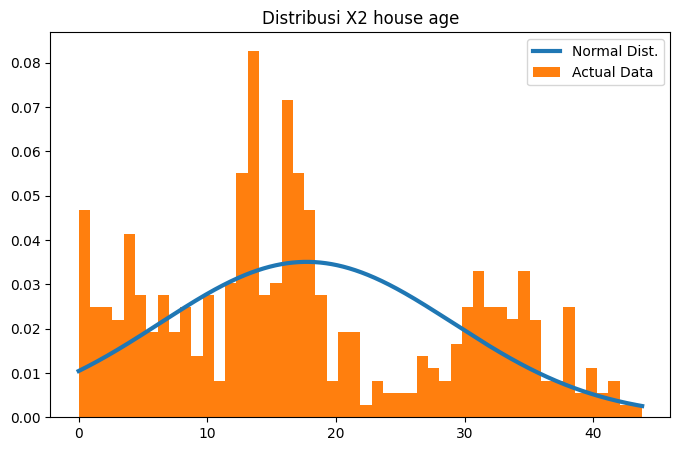

X2 house age p-value: 8.253756825552855e-13


NameError: name 'alpha' is not defined

In [19]:
# Uji dan visualisasi distribusi pada variabel prediktor
predictor_cols = ['X2 house age', 'X5 latitude', 'X6 longitude']

for col in predictor_cols:
    # Visualisasi distribusi prediktor
    plt.figure(figsize=(8, 5))
    xs = np.arange(df[col].min(), df[col].max(), 0.01)
    fit = stats.norm.pdf(xs, np.mean(df[col]), np.std(df[col]))
    plt.plot(xs, fit, label='Normal Dist.', lw=3)
    plt.hist(df[col], 50, density=True, label='Actual Data')
    plt.title(f'Distribusi {col}')
    plt.legend()
    plt.show()
    
    # Uji normalitas prediktor
    stat, p_val = stats.normaltest(df[col])
    print(f'{col} p-value: {p_val}')
    if p_val < alpha:
        print(f'{col} tidak berdistribusi normal (reject H0).')
    else:
        print(f'{col} berdistribusi normal (fail to reject H0).')


### Lakukan analisis distribusi pada variabel prediktor menggunakan cara yang sama dengan variabel target

In [ ]:
# visualisasi variabel prediktor dan melakukan binning

In [ ]:
# pengelompokan data dengan klastering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Mengganti X dan y dengan kolom-kolom yang sesuai dari dataset
X = df[['X3 distance to the nearest MRT station','Y house price of unit area']].to_numpy()
# Misalnya, 'X1 transaction date' dan 'X2 house age' adalah fitur yang Anda ingin gunakan
# Sesuaikan dengan fitur yang Anda ingin gunakan dari dataset tersebut.

range_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data label house age N = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Lakukan ujicoba untuk kandidat fitur yang cocok untuk dikelompokkan berdasarkan klaster dan temukan berapa nilai k optimal?

In [ ]:
from sklearn.cluster import KMeans 

#binn_kmean_n2
clustering = KMeans(n_clusters=2, n_init='auto')
clustering.fit(df[['X3 distance to the nearest MRT station']])
df['Label House Age N=3'] = clustering.labels_

df